In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'],inplace=True)

In [7]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [8]:
df.shape

(29020, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(7661)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(21359, 18)

In [13]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [14]:
df["required_car_parking_space"].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.extend(['required_car_parking_space', 'repeated_guest'])

In [16]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status',
 'required_car_parking_space',
 'repeated_guest']

In [17]:
no_num_cols=df.select_dtypes(exclude=['object']).columns.tolist()
no_num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [18]:
no_num_cols=[col for col in no_num_cols if col not in cat_cols]

In [19]:
no_num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [20]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status',
 'required_car_parking_space',
 'repeated_guest']

In [21]:
data=df.copy()

In [22]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## UNIVARIATE ANALYSIS

In [23]:
def num_plot_dist(df,num_cols):
    fig,axes=plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*5))
    if len(num_cols)==1:
        axes=[axes]

    for i,col in enumerate(num_cols):
        sns.histplot(data=df,x=col,kde=True,ax=axes[i][0],palette="Blues")
        axes[i][0].set_title(f"Histogram for {col}",fontsize=14)

        sns.boxplot(data=df,x=col,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Boxplot for {col}",fontsize=14)

    plt.tight_layout()
    plt.show()

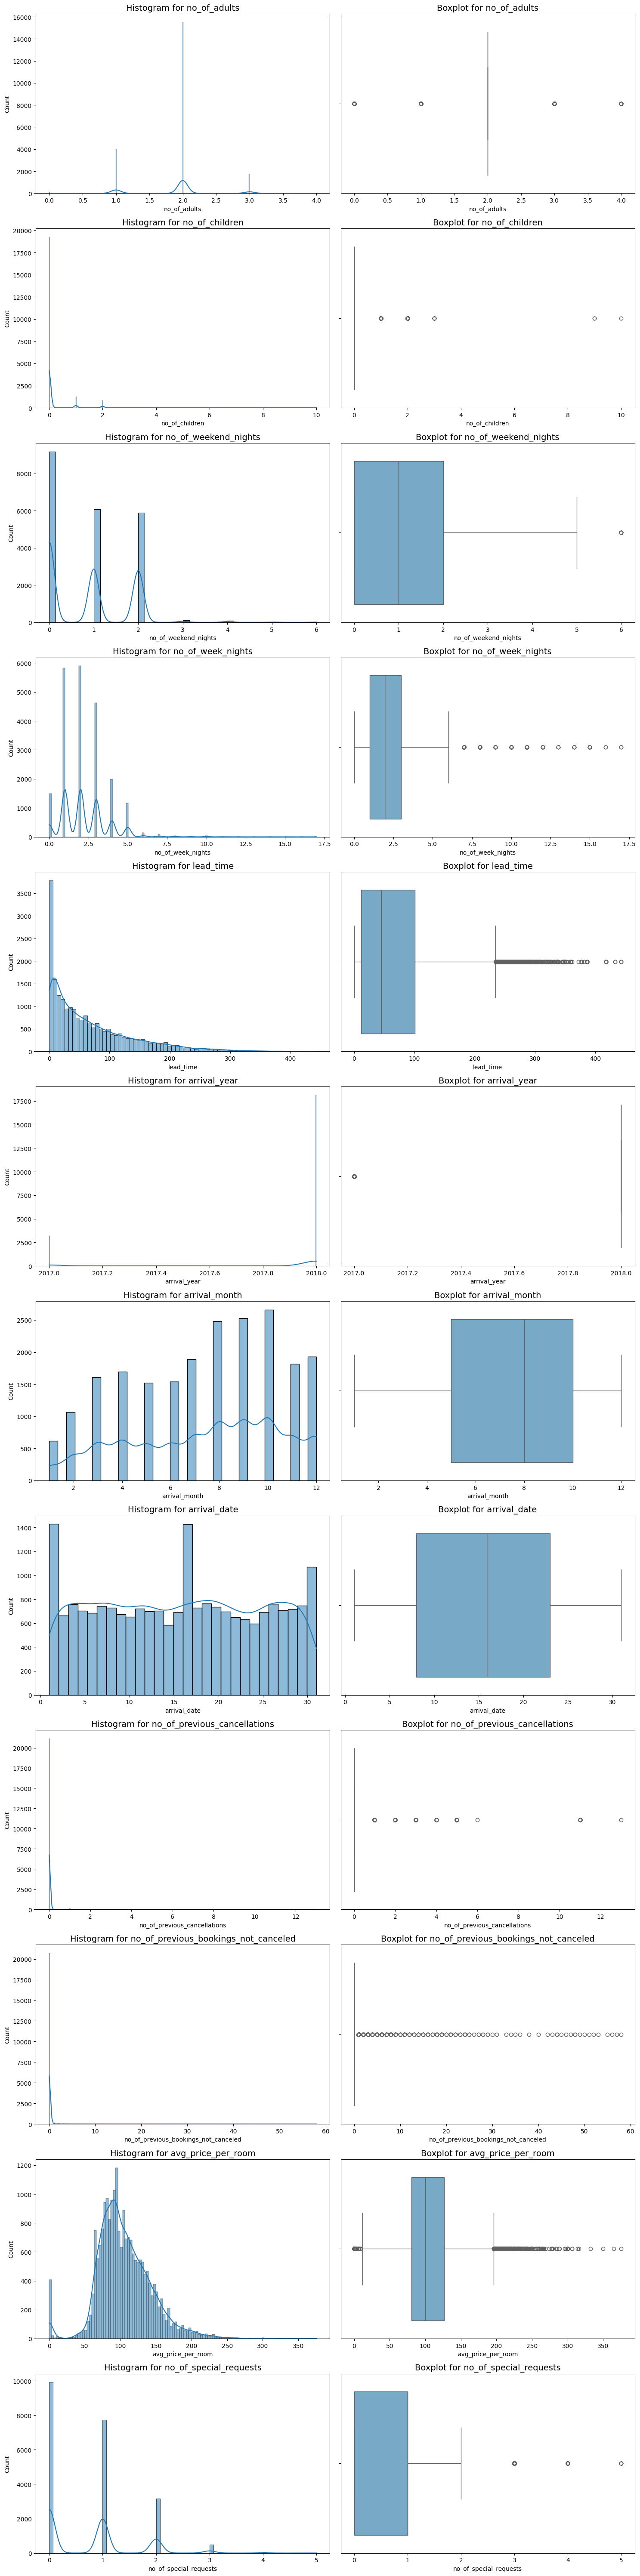

In [24]:
num_plot_dist(data,no_num_cols)

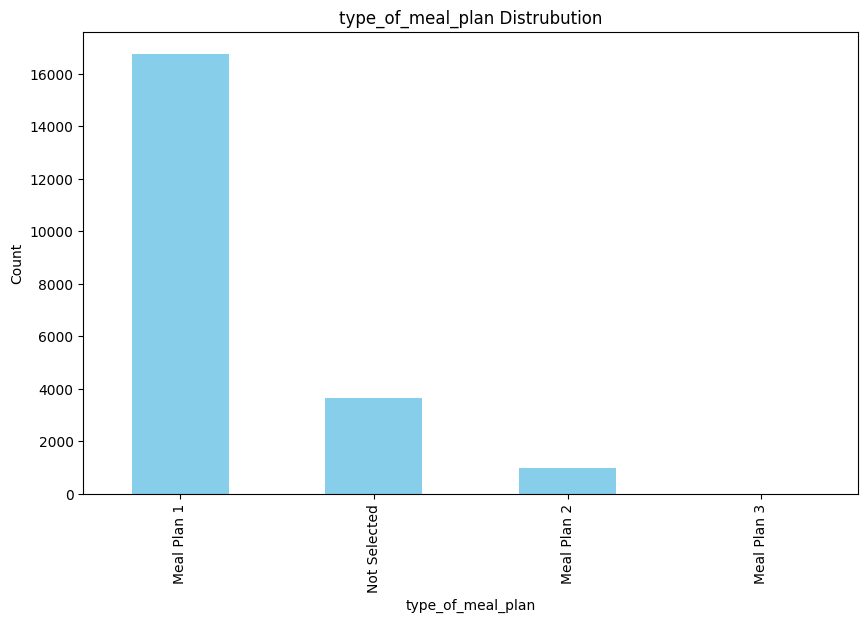

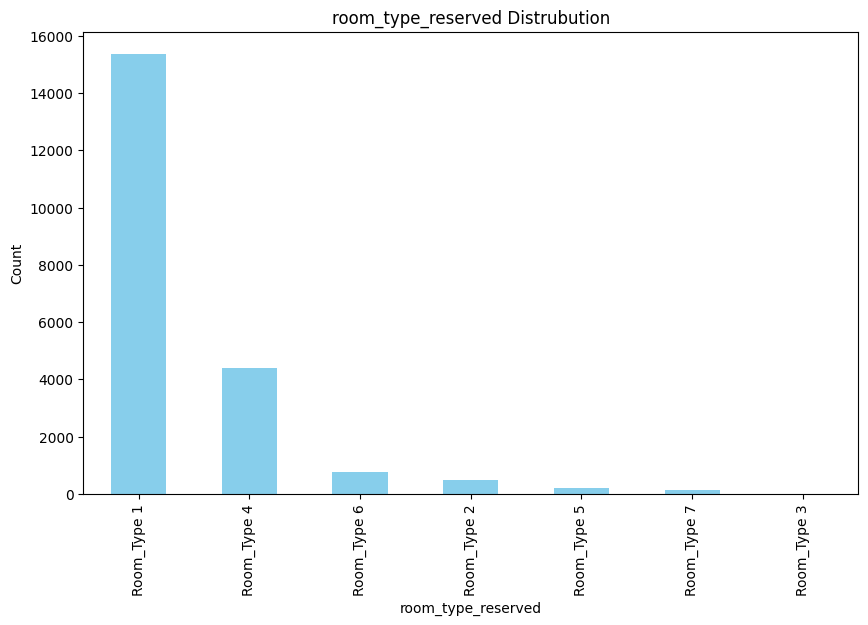

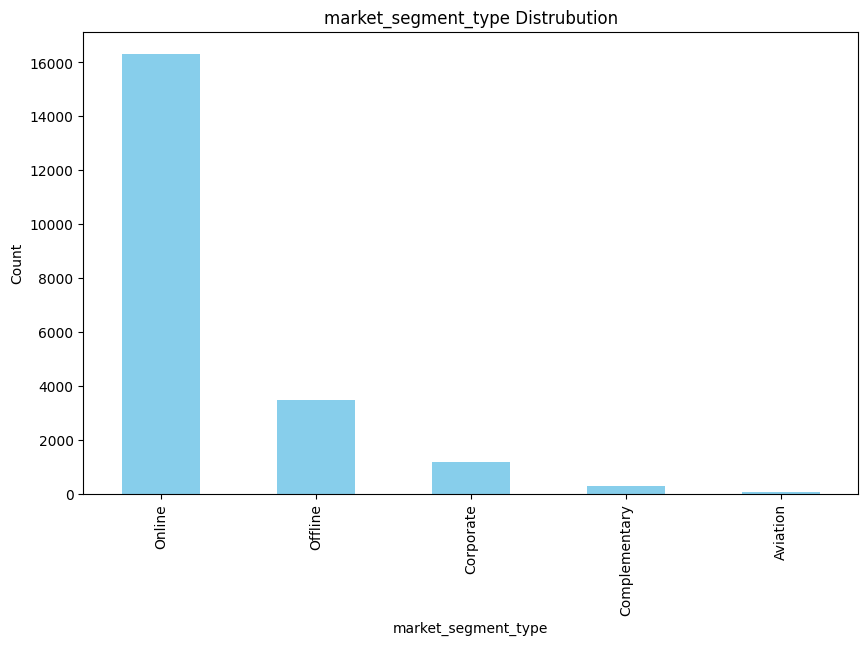

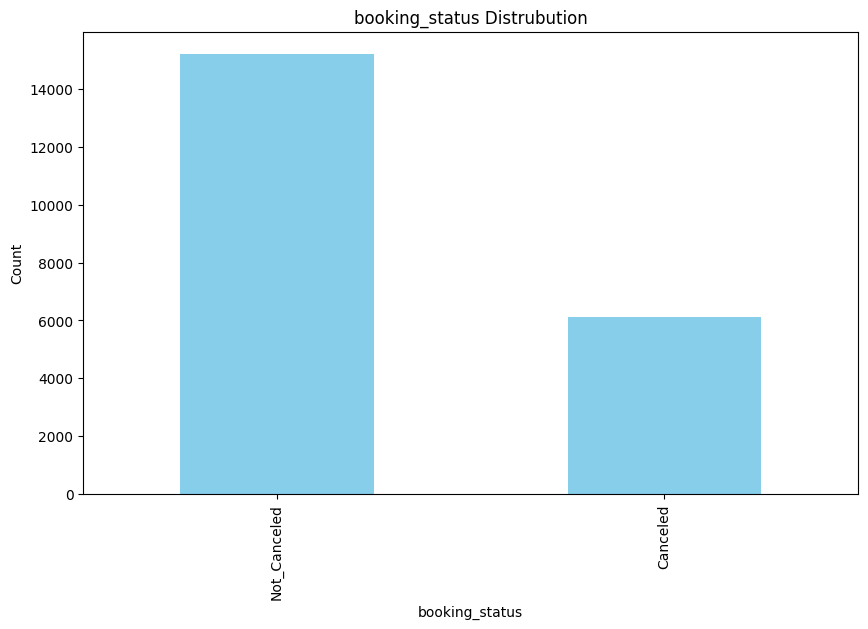

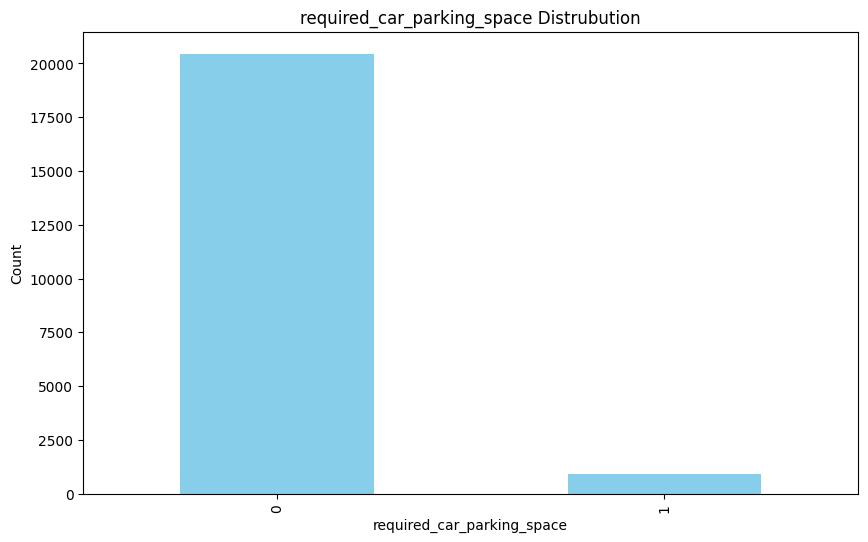

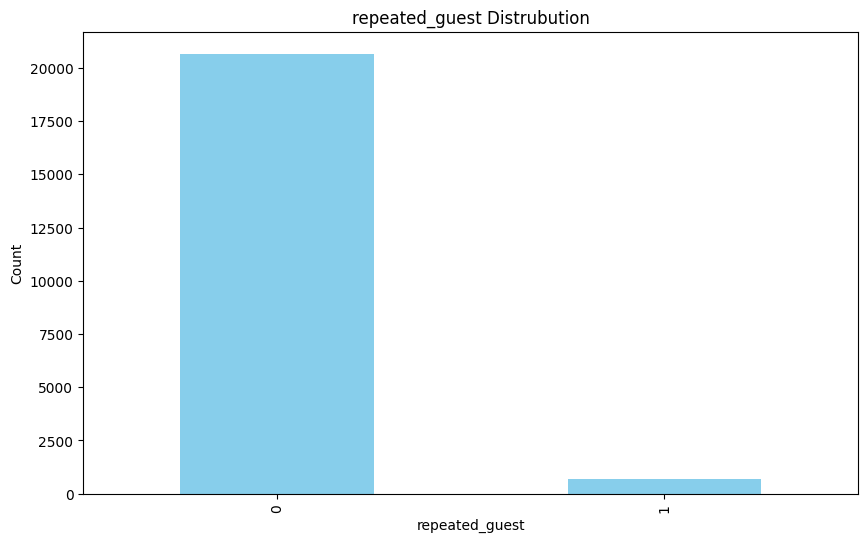

In [25]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} Distrubution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [26]:
def plot_bivariate_num(df,target,num_cols):
    num_plots=len(num_cols)
    num_rows=(num_plots+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))

    axes=axes.flatten()

    for i,col in enumerate(num_cols):
        sns.boxplot(data=df,x=target,y=col,ax=axes[i],palette="Blues")
        axes[i].set_title(f"{col} vs {target}",fontsize=14)

    plt.tight_layout()
    plt.show()

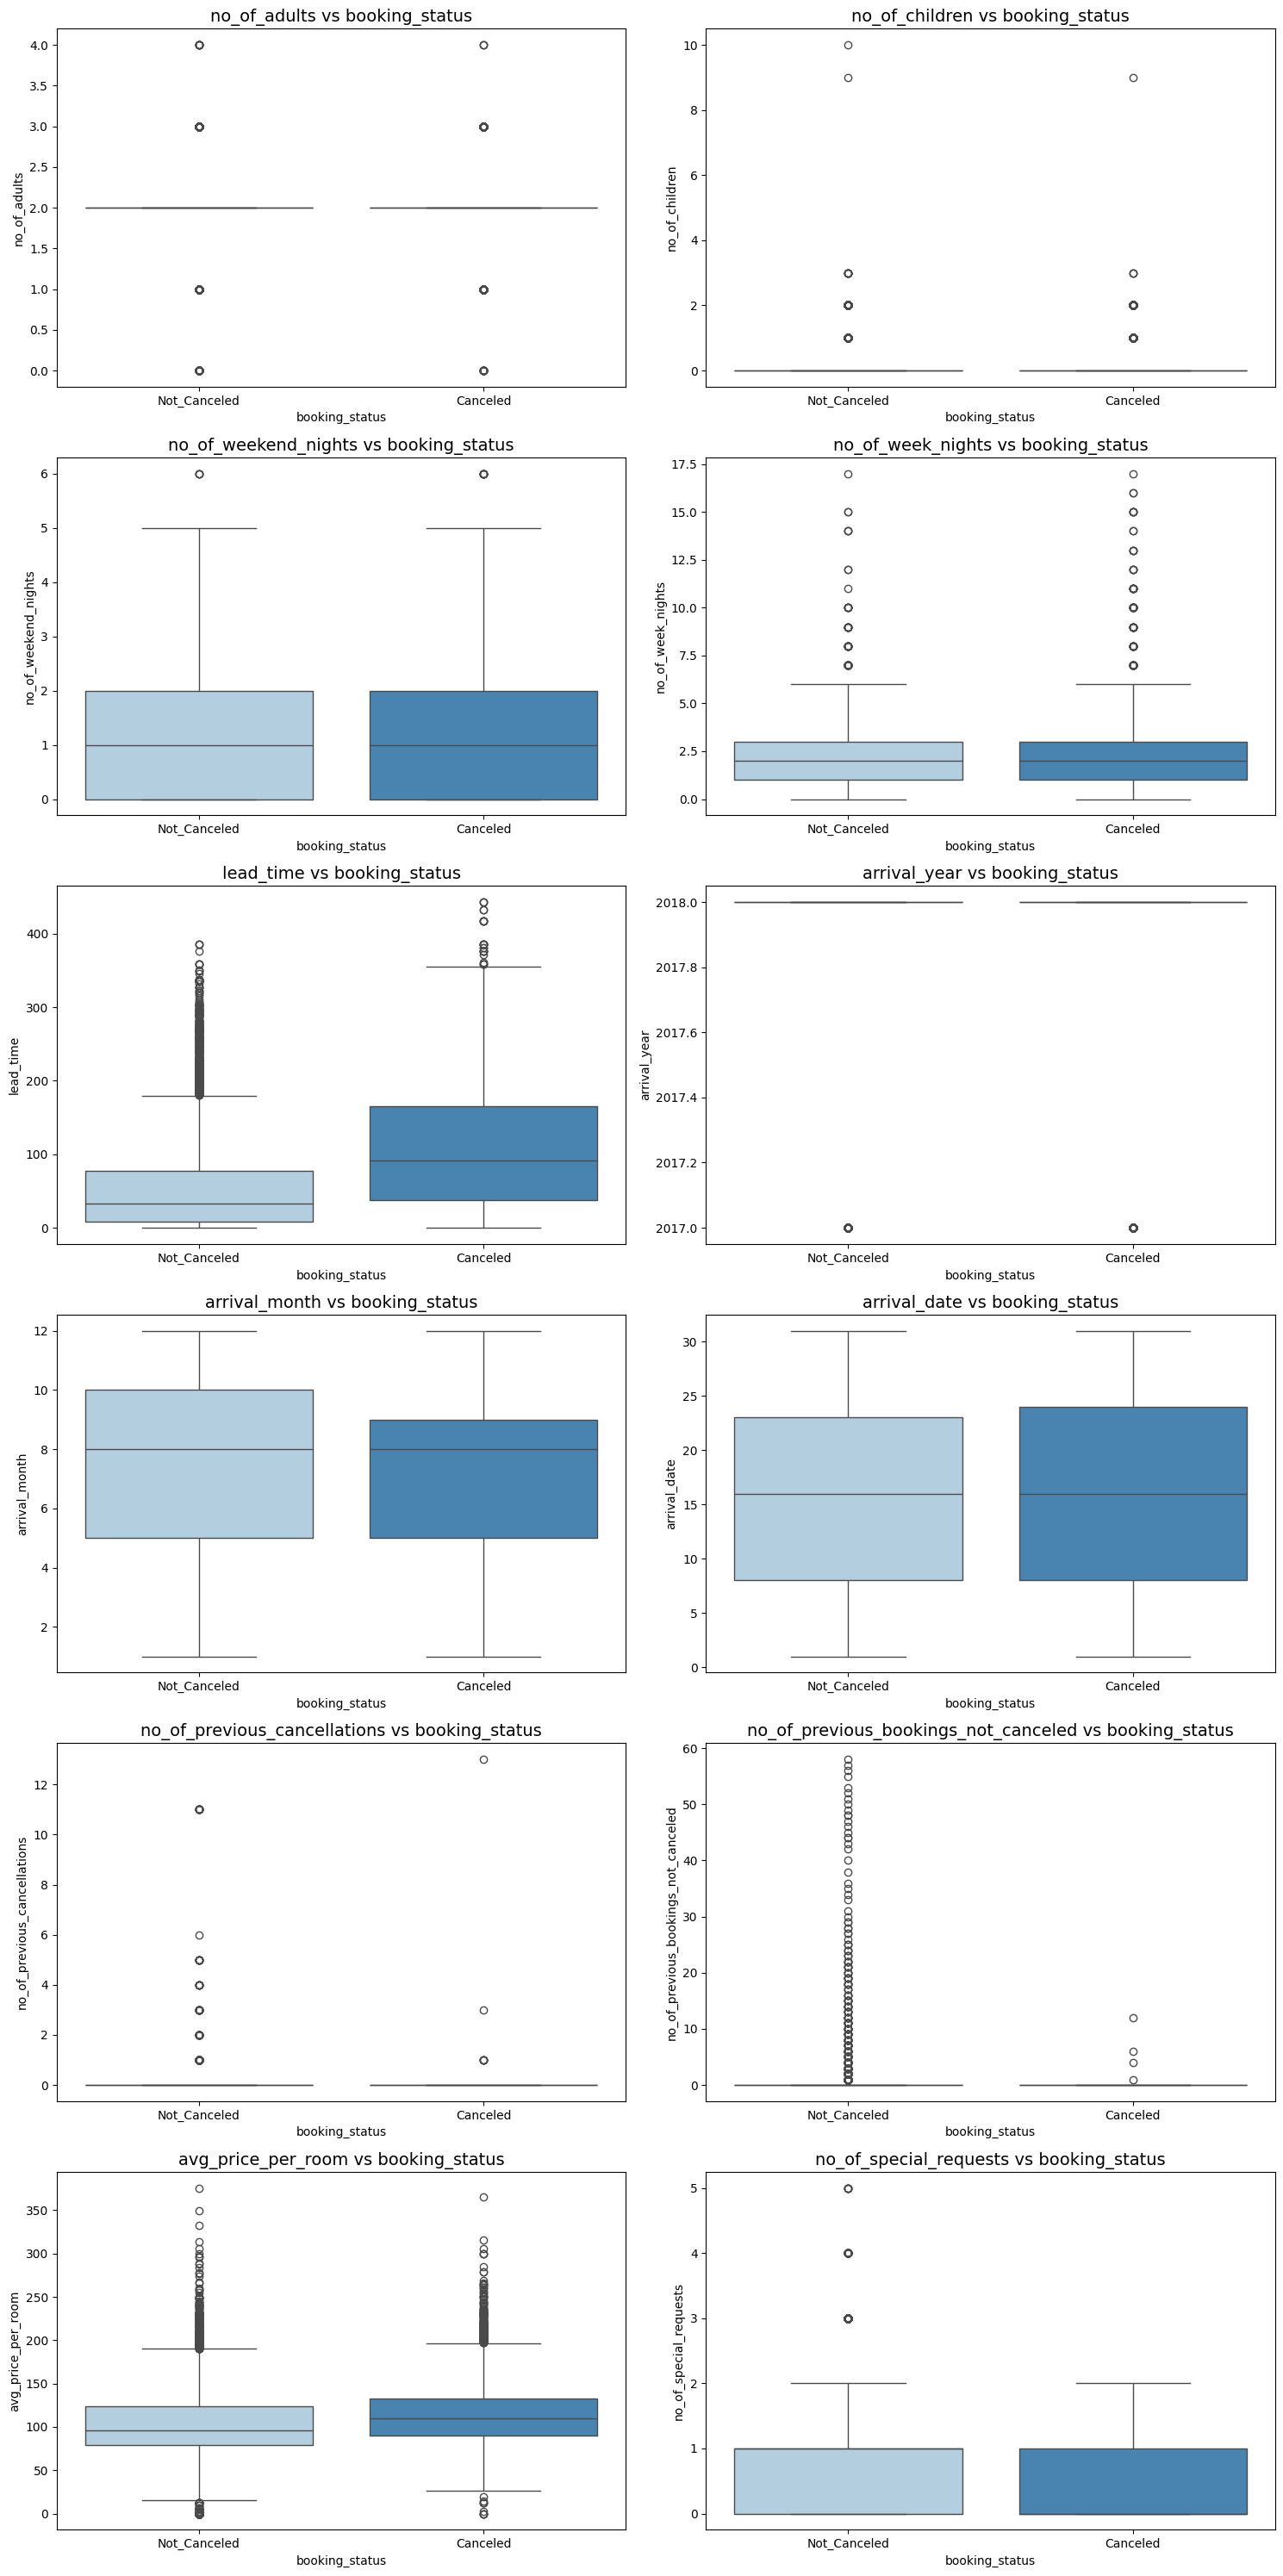

In [27]:
plot_bivariate_num(data,'booking_status',no_num_cols)

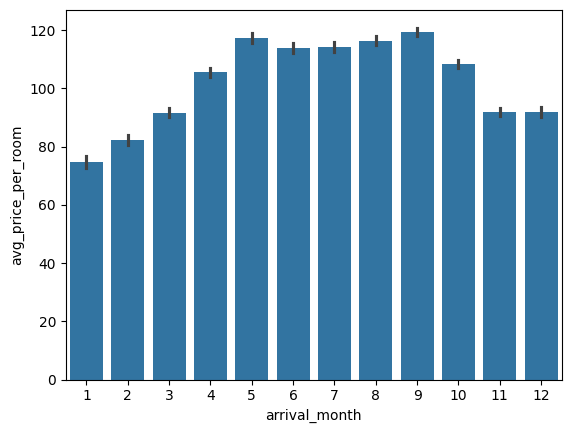

In [28]:
sns.barplot(x='arrival_month',y='avg_price_per_room',data=data)
plt.show()

In [29]:
def plot_bivariate_cat(df,target,cat_cols):

    num_features=len(cat_cols)
    num_rows=(num_features+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))

    axes=axes.flatten()

    for i,col in enumerate(cat_cols):
        sns.countplot(data=df,x=col,hue=target,ax=axes[i],palette="Set2")
        axes[i].set_title(f"{col} vs {target}",fontsize=14)
        axes[i].legend(title=target)
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

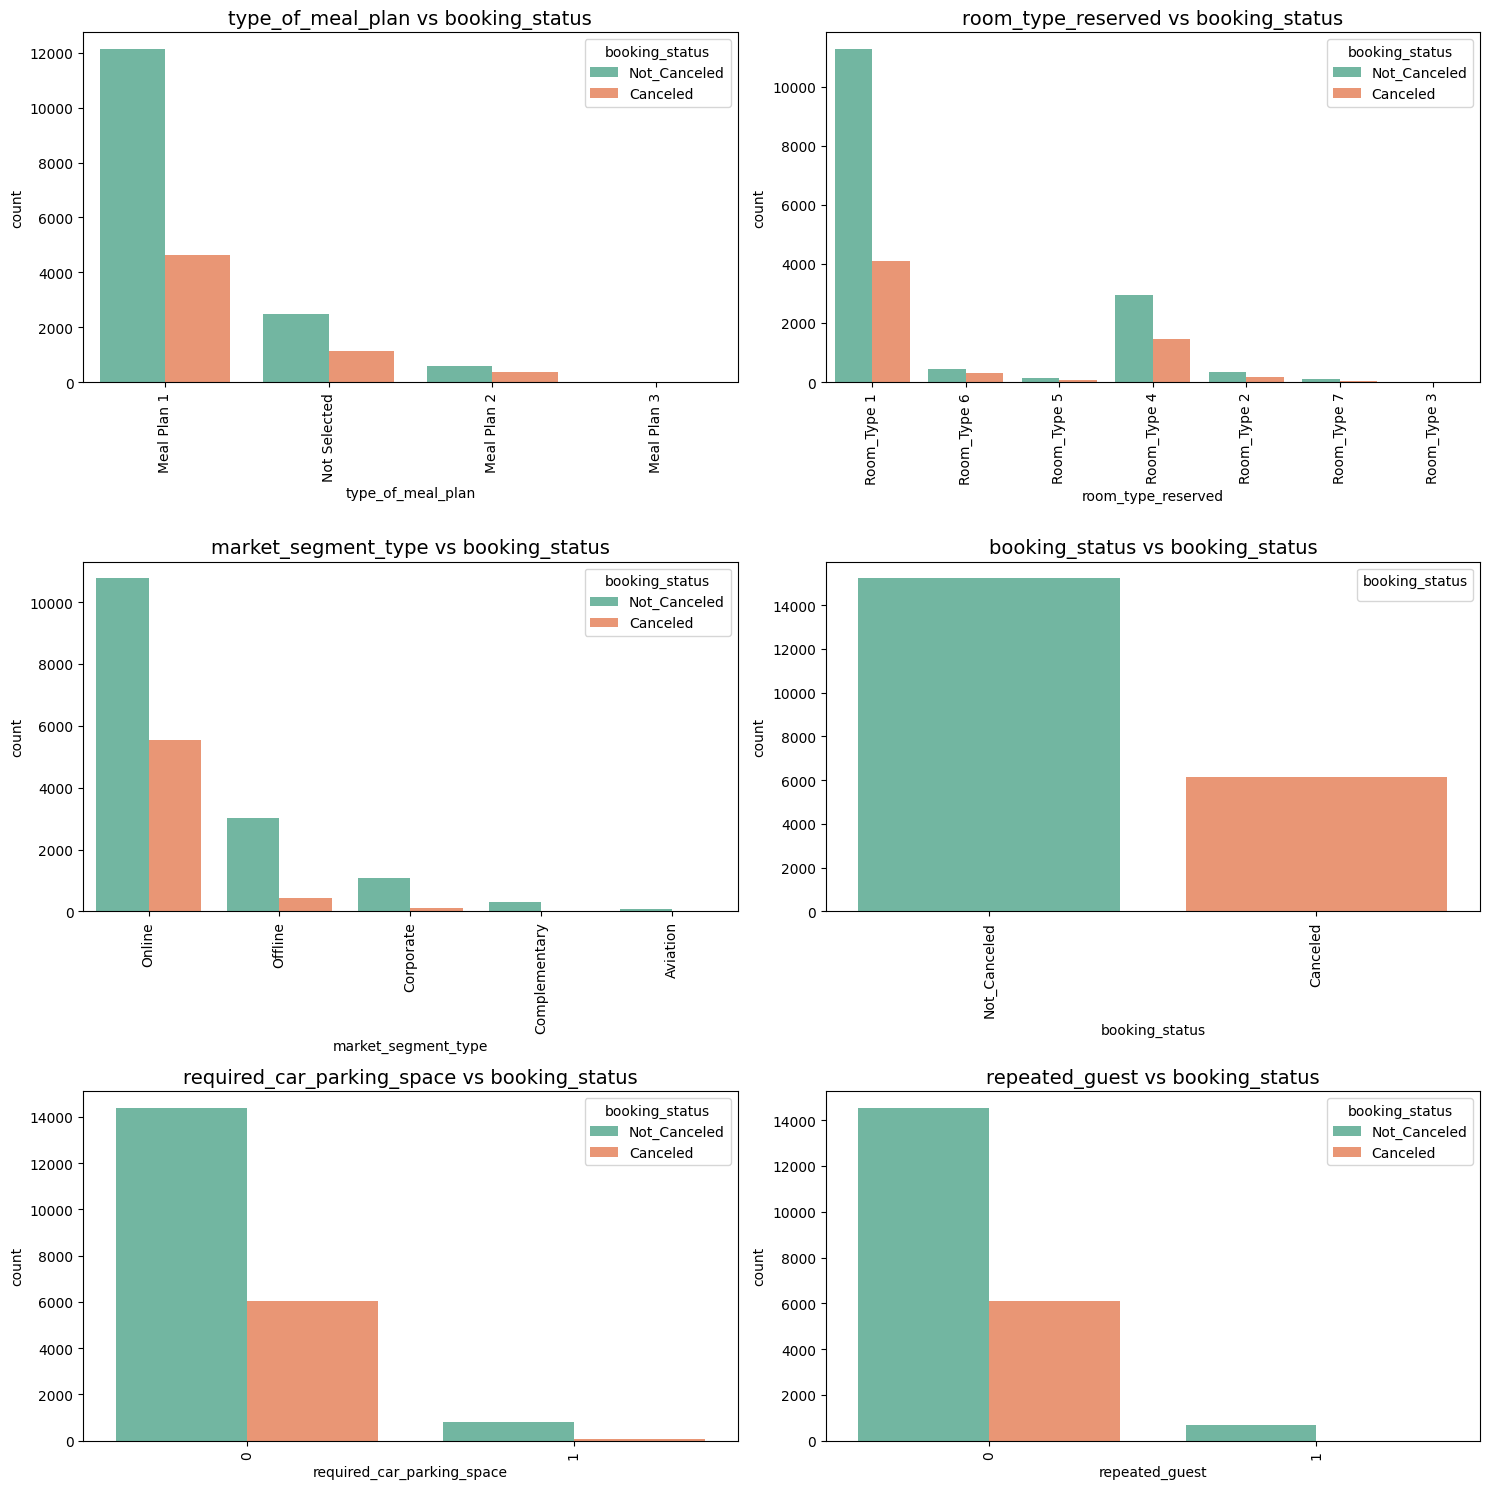

In [30]:
plot_bivariate_cat(data,'booking_status',cat_cols)

In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [33]:
from sklearn.preprocessing import LabelEncoder


In [34]:
le=LabelEncoder()

mappings={}
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
    mappings[col]={label: code for label,code in zip(le.classes_, le.transform(le.classes_))}


In [35]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [36]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [38]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [40]:
x=add_constant(df)

vif_data=pd.DataFrame()

vif_data["feature"]=x.columns

vif_data["VIF"]=[round(variance_inflation_factor(x.values,i),2) for i in range(x.shape[1])]

In [41]:
vif_data

,feature,VIF
0,const,41001965.80
1,no_of_adults,1.34
2,no_of_children,1.28
3,no_of_weekend_nights,1.07
4,no_of_week_nights,1.13
5,type_of_meal_plan,1.18
6,required_car_parking_space,1.04
7,room_type_reserved,1.55
8,lead_time,1.41
9,arrival_year,1.29


In [42]:
corr=df.corr()


<Axes: >

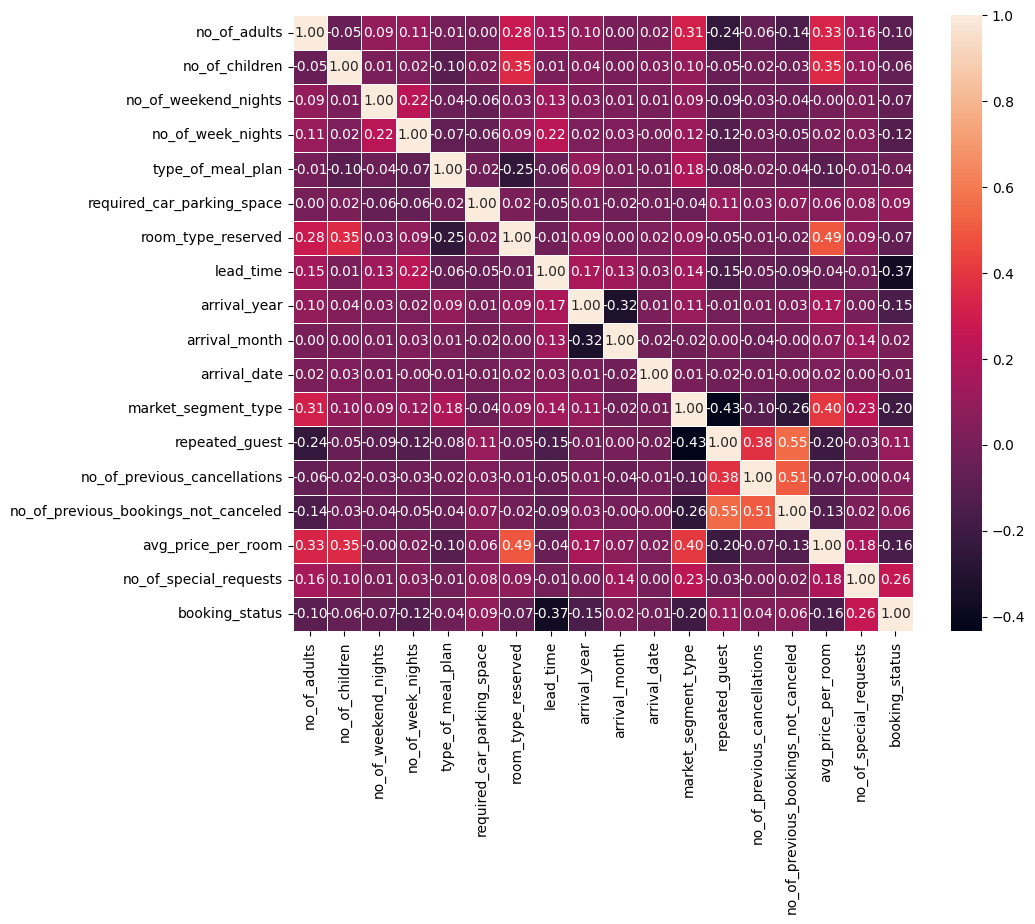

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",linewidths=0.5)

In [44]:
skewness=df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [45]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [46]:
df.skew()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [47]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [48]:
x=df.drop(columns=['booking_status'])
y=df['booking_status']

In [49]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,3,0,0,1,0,0,3,65,2018,6,21,4,0.0,0.0,0.0,132.30,0
29013,2,0,2,3,0,0,0,86,2018,6,17,4,0.0,0.0,0.0,126.90,1
29014,2,0,0,2,0,0,3,0,2018,10,12,4,0.0,0.0,0.0,139.50,1
29015,2,0,2,2,0,0,0,43,2017,12,26,3,0.0,0.0,0.0,55.00,2


In [50]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int64

In [51]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

x_res,y_res=smote.fit_resample(x,y)

In [54]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [55]:
new_df=pd.concat([x_res,y_res],axis=1)
new_df.shape

(30462, 18)

In [56]:
new_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [57]:
df=new_df.copy()

In [58]:
df.shape

(30462, 18)

In [59]:
len(df.columns)

18

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [62]:
model=RandomForestClassifier(random_state=42)
model.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
feature_importance=model.feature_importances_

In [64]:
feature_importance_df=pd.DataFrame({'Feature':x.columns,'Importance':feature_importance})

In [65]:
top_10_features=feature_importance_df.sort_values(by='Importance',ascending=False)[:10]

In [66]:
top_10_df=df[top_10_features.values[:,0].tolist() + ["booking_status"]]

In [67]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [68]:
df=top_10_df.copy()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [70]:
df.shape

(30462, 11)

In [71]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
classifiers={
    "Logistic Regression":LogisticRegression(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "AdaBoost":AdaBoostClassifier(random_state=42),
    "Support Vector Machine":SVC(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes":GaussianNB(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "XGBoost":XGBClassifier(random_state=42),
    "LightGBM":LGBMClassifier(random_state=42)
}

In [74]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1-Score":[]
}

In [75]:
for model_name,model in classifiers.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(round(accuracy_score(y_test,y_pred),4))  
    metrics["Precision"].append(round(precision_score(y_test,y_pred),4))
    metrics["Recall"].append(round(recall_score(y_test,y_pred),4))
    metrics["F1-Score"].append(round(f1_score(y_test,y_pred),4))

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [76]:
metrics_df=pd.DataFrame(metrics)

In [77]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7743,0.8028,0.7319,0.7657
1,Random Forest,0.8917,0.8925,0.8925,0.8925
2,Gradient Boosting,0.8372,0.8215,0.8648,0.8426
3,AdaBoost,0.8042,0.8213,0.7814,0.8009
4,Support Vector Machine,0.7203,0.7297,0.7068,0.7181
5,Decision Tree,0.8408,0.8500,0.8306,0.8402
6,Gaussian Naive Bayes,0.7733,0.8032,0.7287,0.7641
7,K-Nearest Neighbors,0.7794,0.8566,0.6752,0.7552
8,XGBoost,0.8703,0.8663,0.8782,0.8722
9,LightGBM,0.8667,0.8515,0.8909,0.8707


In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [79]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
rf=RandomForestClassifier(random_state=42)

In [82]:
params_dist={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False]
}

In [83]:
random_Search=RandomizedSearchCV(estimator=rf,param_distributions=params_dist,n_iter=10,cv=3,
                                 random_state=42,verbose=2,scoring='accuracy')

In [84]:
random_Search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   7.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   7.0s
[CV

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....002527C217F90>, 'min_samples_leaf': <scipy.stats....002527C211990>, 'min_samples_split': <scipy.stats....002527C1FFB10>, ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [85]:
random_Search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [86]:
best_rf_model=random_Search.best_estimator_

In [87]:
best_rf_model

,n_estimators,413
,criterion,'gini'
,max_depth,30
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [88]:
y_pred=best_rf_model.predict(x_test)

In [89]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)


In [90]:
accuracy,precision,recall,f1

(0.8959461677334646,
 0.8946856772521062,
 0.8993485342019544,
 0.8970110461338532)

In [2]:
import joblib

In [92]:
# joblib.dump(best_rf_model,'model.joblib')

In [93]:
joblib.dump(best_rf_model, 'model1.pkl')

['model1.pkl']

In [3]:
model_loaded=joblib.load('model.joblib')

In [7]:
new_data=np.array([[190,1,93.5,9,8,4,5,2,0,0]])

In [10]:
prediction=model_loaded.predict(new_data)
prediction

e:\Data Science\mlops\gcp-mlops\hotel-reservation-project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])